In [4]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Step 2: Load CIFAR-10 Dataset (no manual /255.0)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
# Step 3: Data Augmentation for Small CNN
aug_small = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
aug_small.fit(train_images/255.0)
train_gen_small = aug_small.flow(train_images/255.0, train_labels, batch_size=64)

In [7]:
# Step 4: Build Small CNN Model (Task 1)
small_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
small_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Step 5: Compile Small CNN (Task 2)
small_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
# Step 6: Train Small CNN
history_small = small_model.fit(
    train_gen_small,
    epochs=20,
    validation_data=(test_images/255.0, test_labels)
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 121ms/step - accuracy: 0.2818 - loss: 1.9262 - val_accuracy: 0.4832 - val_loss: 1.4237
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.4757 - loss: 1.4493 - val_accuracy: 0.5750 - val_loss: 1.1967
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step - accuracy: 0.5381 - loss: 1.2974 - val_accuracy: 0.6013 - val_loss: 1.1183
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.5724 - loss: 1.2131 - val_accuracy: 0.6229 - val_loss: 1.0647
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 122ms/step - accuracy: 0.5867 - loss: 1.1592 - val_accuracy: 0.6438 - val_loss: 1.0314
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.6144 - loss: 1.0941 - val_accuracy: 0.6688 - val_loss: 0.9650
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 121ms/step - accuracy: 0.6279 - loss: 1.0644 - val_accuracy: 0.6669 - val_loss: 0.9532
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.6299 - loss: 1.0388 - val

In [10]:
# Step 7: Evaluate Small CNN
test_loss, test_acc = small_model.evaluate(test_images/255.0, test_labels, verbose=2)
print(f"Small CNN Test accuracy: {test_acc:.4f}")


313/313 - 5s - 15ms/step - accuracy: 0.7222 - loss: 0.8339
Small CNN Test accuracy: 0.7222


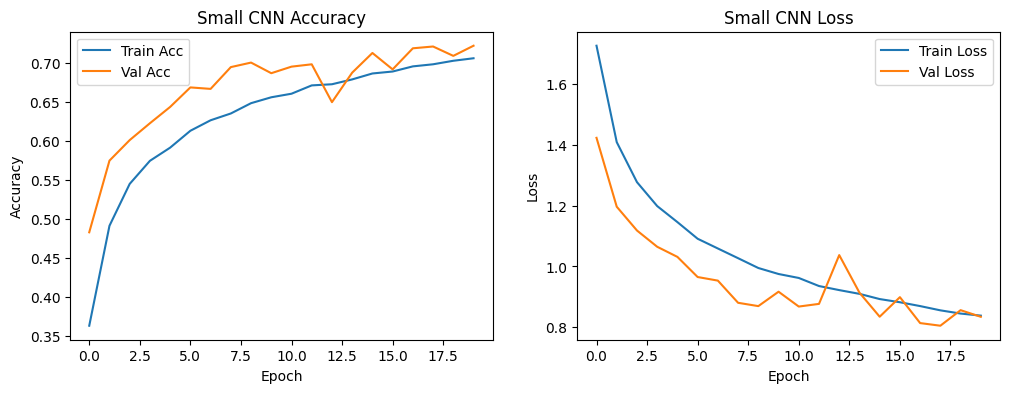

In [11]:
# Step 8: Visualization of Small CNN Training
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_small.history['accuracy'], label='Train Acc')
plt.plot(history_small.history['val_accuracy'], label='Val Acc')
plt.title('Small CNN Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.subplot(1,2,2)
plt.plot(history_small.history['loss'], label='Train Loss')
plt.plot(history_small.history['val_loss'], label='Val Loss')
plt.title('Small CNN Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


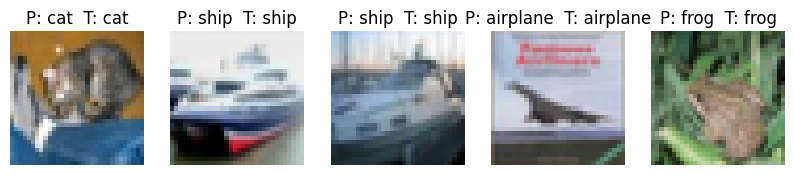

In [12]:
# Step 9: Predictions Demonstration - Small CNN
predictions = small_model.predict(test_images[:5] / 255.0)

plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(
        f"P: {class_names[np.argmax(predictions[i])]}  "
        f"T: {class_names[test_labels[i][0]]}"
    )
    plt.axis('off')
plt.show()


In [15]:
# Step 17: Save Model Performance for Autograding
with open('model_accuracy.txt', 'w') as f:
    f.write(f"TestAcc:{test_acc:.4f}\n")
    f.write(f"TrainAcc:{history_small.history['accuracy'][-1]:.4f}\n")
    f.write(f"ValAcc:{history_small.history['val_accuracy'][-1]:.4f}\n")
    f.write(f"Epochs:{len(history_small.history['accuracy'])}\n")
    f.write(f"Params:{small_model.count_params()}\n")

print("Saved model_accuracy.txt")

Saved model_accuracy.txt
